## Machine Learning Model Building Pipeline: Data Analysis

In the following videos, we will take you through a practical example of each one of the steps in the Machine Learning model building pipeline that we described in the previous lectures. There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 1: Data Analysis**

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses. 

### Why is this important? 

Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.

### What is the objective of the machine learning model?

We aim to minimise the difference between the real price, and the estimated price by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

### How do I download the dataset?

To download the House Price dataset go this website:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'houseprice.csv' and save it to a directory of your choice.

**Note the following:**
-  You need to be logged in to Kaggle in order to download the datasets.
-  You need to accept the terms and conditions of the competition to download the dataset
-  If you save the file to the same directory where you saved this jupyter notebook, then you can run the code as it is written here.

====================================================================================================

## House Prices dataset: Data Analysis

In the following cells, we will analyse the variables of the House Price Dataset from Kaggle. I will take you through the different aspects of the analysis that we will make over the variables, and introduce you to the meaning of each of the variables as well. If you want to know more about this dataset, visit [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Let's go ahead and load the dataset.

In [2]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#to display all the column of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [4]:
#import dataset
data = pd.read_csv('data/houseprice.csv')

#number of rows and columns in dataframe
print('Rows: ', data.shape[0], '\tColumns: ', data.shape[1])

#print first 5 rows
data.head()

Rows:  1460 	Columns:  81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The house price dataset contains 1460 rows, i.e., houses, and 81 columns, i.e., variables. 

**We will analyse the dataset to identify:**

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables
7. Potential relationship between the variables and the target: SalePrice

### Missing values

Let's go ahead and find out which variables of the dataset contain missing values

In [11]:
#fetch variables containing missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 1]

#print the % of missing values for each variable in vars_with_na
for i in vars_with_na:
    print(i , np.round(data[i].isnull().mean(),2)  ,'% missing values')

LotFrontage 0.18 % missing values
Alley 0.94 % missing values
MasVnrType 0.01 % missing values
MasVnrArea 0.01 % missing values
BsmtQual 0.03 % missing values
BsmtCond 0.03 % missing values
BsmtExposure 0.03 % missing values
BsmtFinType1 0.03 % missing values
BsmtFinType2 0.03 % missing values
FireplaceQu 0.47 % missing values
GarageType 0.06 % missing values
GarageYrBlt 0.06 % missing values
GarageFinish 0.06 % missing values
GarageQual 0.06 % missing values
GarageCond 0.06 % missing values
PoolQC 1.0 % missing values
Fence 0.81 % missing values
MiscFeature 0.96 % missing values


Our dataset contains a few variables with missing values. We need to account for this in our following notebook / video, where we will engineer the variables for use in Machine Learning Models.

#### Relationship between values being missing and Sale Price

Let's evaluate the price of the house for those cases where the information is missing, for each variable.

In [17]:
def analyse_na_values(df,var):
    df = df.copy()
    
    #make a variable that indeicates 1 if the obs is missing else 0
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    #calculate the mean sale price for both the category missing or not missing values
    df.groupby(var)['SalePrice'].mean().plot.bar()
    plt.title(var)
    plt.show()  

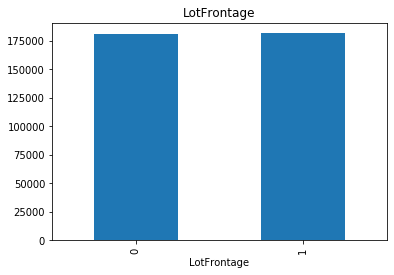

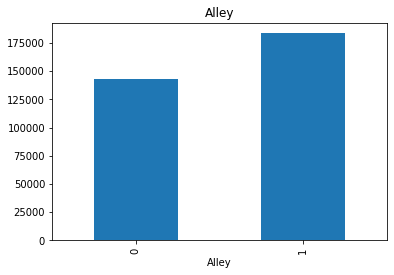

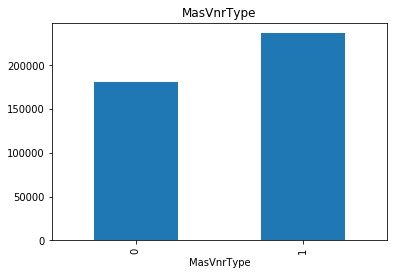

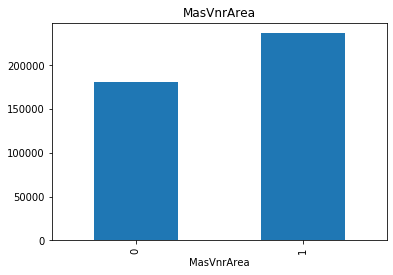

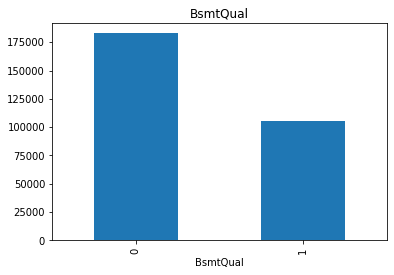

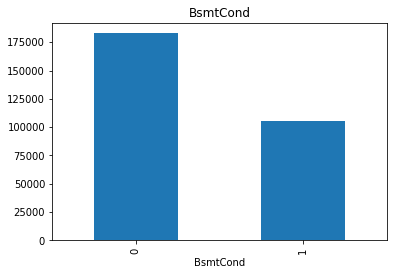

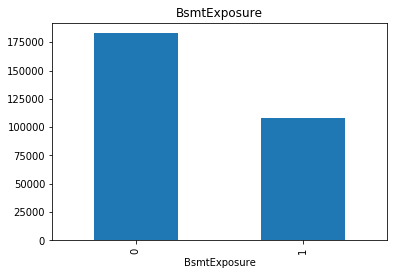

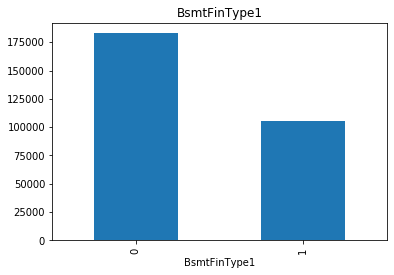

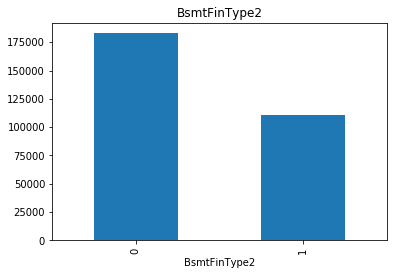

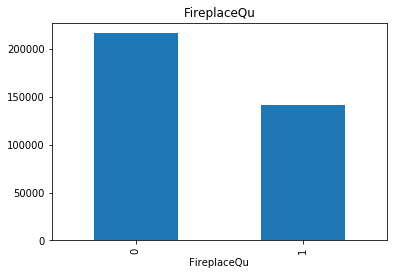

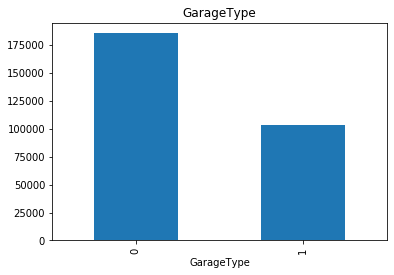

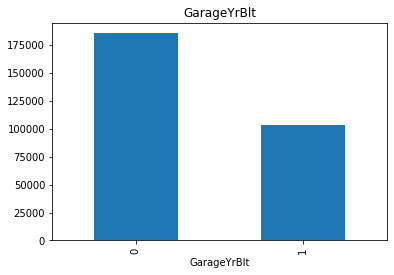

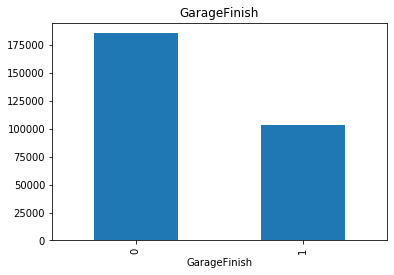

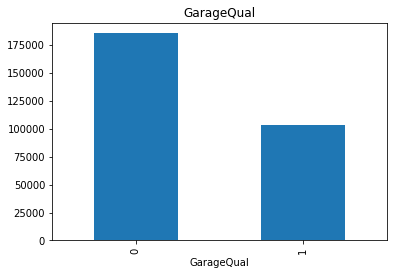

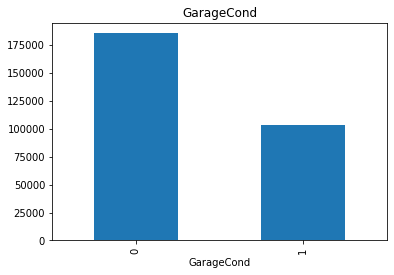

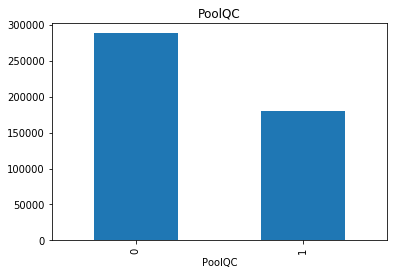

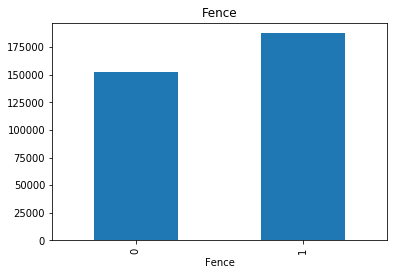

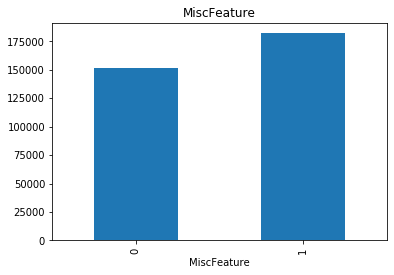

In [18]:
for var in vars_with_na:
    analyse_na_values(data, var)

We see that the fact that the information is missing for those variables, is important. We will capture this information when we engineer the variables in our next lecture / video.

### Numerical variables

Let's go ahead and find out what numerical variables we have in the dataset

In [20]:
#list of numeric variable
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

#number of numeric variable
print('Number of numeric variable: ',len(num_vars))

#visualize numeric variable
data[num_vars].head()

Number of numeric variable:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


From the above view of the dataset, we notice the variable Id, which is an indicator of the house. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each house in the dataset. See below:

In [25]:
print('Number of IDs in dataset: ',len(data.Id.unique()))
print('Number of rows in dataset: ',len(data))


Number of IDs in dataset:  1460
Number of rows in dataset:  1460


#### Temporal variables

From the above view we also notice that we have 4 year variables. Typically, we will not use date variables as is, rather we extract information from them. For example, the difference in years between the year the house was built and the year the house was sold. We need to take this into consideration in our next video / notebook, where we will engineer our features.

In [27]:
#list the variables containing Year information
years_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
years_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [31]:
#print all unique values in year_vars
for year in years_vars:
    print(year , data[year].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

As you can see, it refers to years.

We can also explore the evolution of the sale price with the years in which the house was sold: